In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


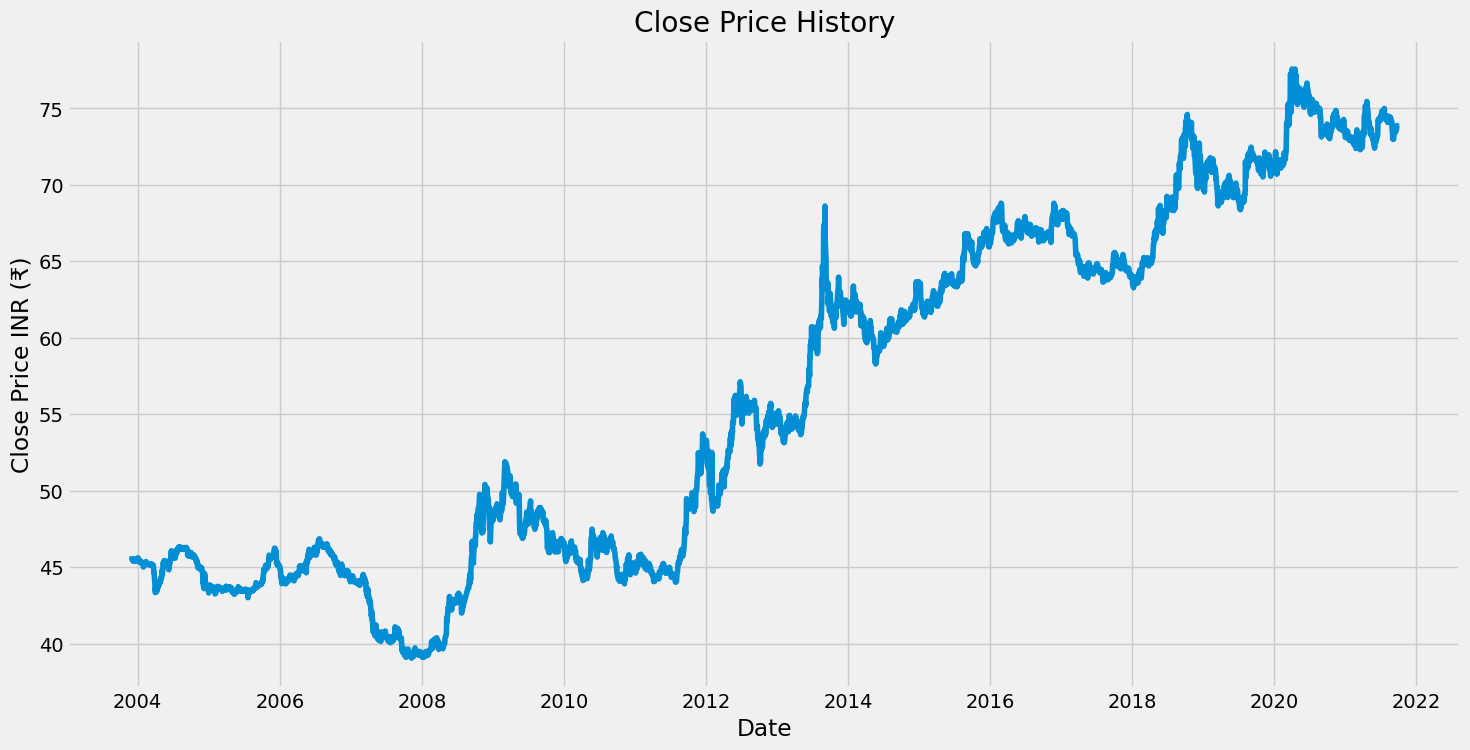

3619/3619 [==============================] - 14s 4ms/step - loss: 0.0061
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 61        
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
29/29 [==============================] - 1s 11ms/step


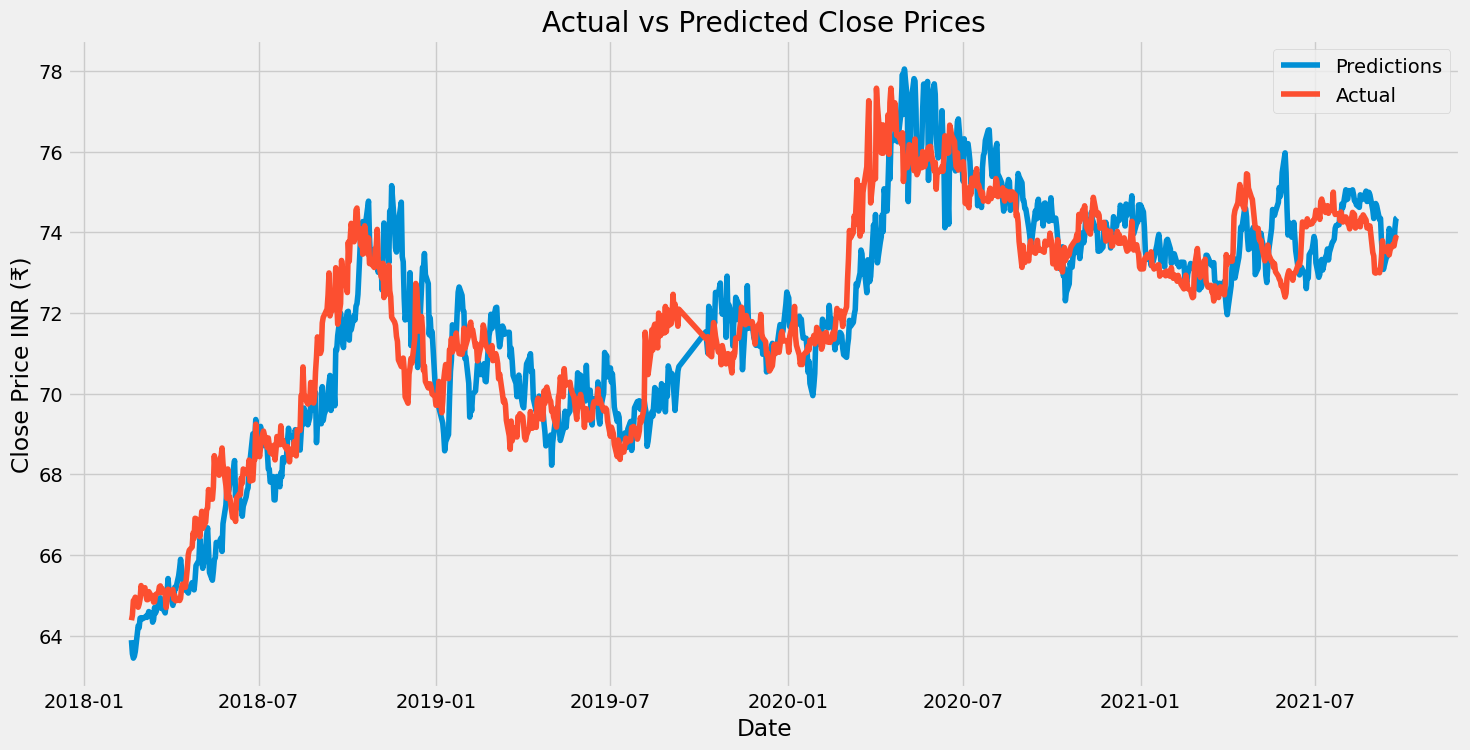

Accuracy: 83.44679842151237%


In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LinearRegression

# Load and preprocess the data
data = pd.read_csv('/content/drive/MyDrive/Project/USDINRX.csv')
data = data.dropna()
data = data.astype({'Date': 'datetime64[ns]'})

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Date'],data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price INR (₹)')
plt.show()

# Prepare the dataset
df = data.filter(['Close'])
dataset = df.values
train_data_len = math.ceil(len(dataset)*.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(dataset)

train_data = scaler_data[0:train_data_len , :]
x_train = []
y_train = []

for i in range(60 , len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Create and train the linear regression model
model = Sequential()
model.add(Dense(1, input_dim=60))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=1, batch_size=1)

# Print model summary
print(model.summary())

# Make predictions
test_data = scaler_data[train_data_len - 60:, :]
x_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

# Visualize the predictions
plt.figure(figsize=(16,8))
plt.plot(data['Date'][-len(pred):], pred, label='Predictions')
plt.plot(data['Date'][-len(pred):], data['Close'][-len(pred):], label='Actual')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price INR (₹)')
plt.title('Actual vs Predicted Close Prices')
plt.show()


from sklearn.metrics import r2_score

r2 = r2_score(data['Close'][-len(pred):], pred)
print(f"Accuracy: {r2*100}%")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4650 non-null   object 
 1   Open       4598 non-null   float64
 2   High       4598 non-null   float64
 3   Low        4598 non-null   float64
 4   Close      4598 non-null   float64
 5   Adj Close  4598 non-null   float64
 6   Volume     4598 non-null   float64
dtypes: float64(6), object(1)
memory usage: 254.4+ KB


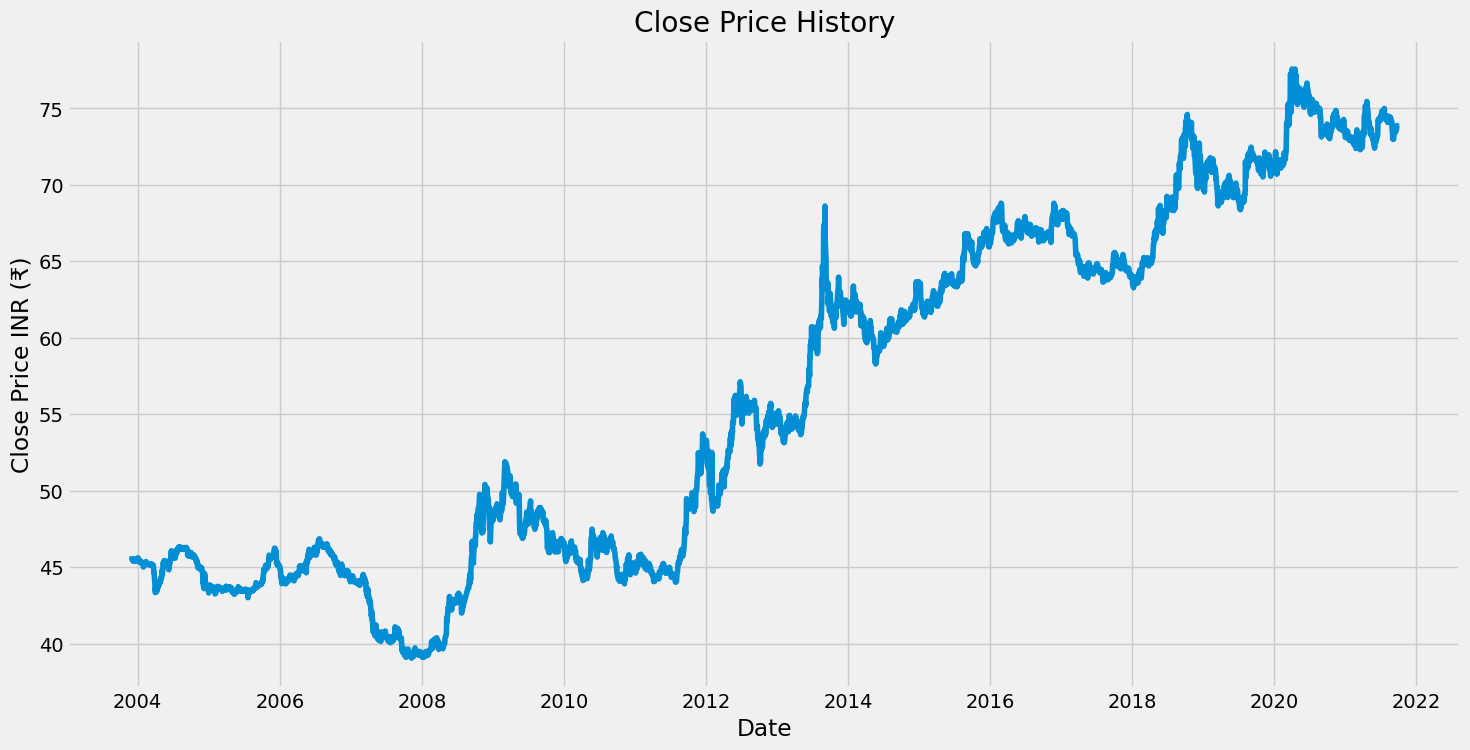

Epoch 1/10
3619/3619 [==============================] - 162s 42ms/step - loss: 6.1554e-04
Epoch 2/10
3619/3619 [==============================] - 146s 40ms/step - loss: 2.4413e-04
Epoch 3/10
3619/3619 [==============================] - 146s 40ms/step - loss: 1.5136e-04
Epoch 4/10
3619/3619 [==============================] - 145s 40ms/step - loss: 1.3841e-04
Epoch 5/10
3619/3619 [==============================] - 146s 40ms/step - loss: 1.1569e-04
Epoch 6/10
3619/3619 [==============================] - 143s 40ms/step - loss: 1.1229e-04
Epoch 7/10
3619/3619 [==============================] - 144s 40ms/step - loss: 1.0277e-04
Epoch 8/10
3619/3619 [==============================] - 142s 39ms/step - loss: 1.1101e-04
Epoch 9/10
3619/3619 [==============================] - 144s 40ms/step - loss: 1.0378e-04
Epoch 10/10
29/29 [==============================] - 1s 19ms/step


<ipython-input-8-aaa87812e25f>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred


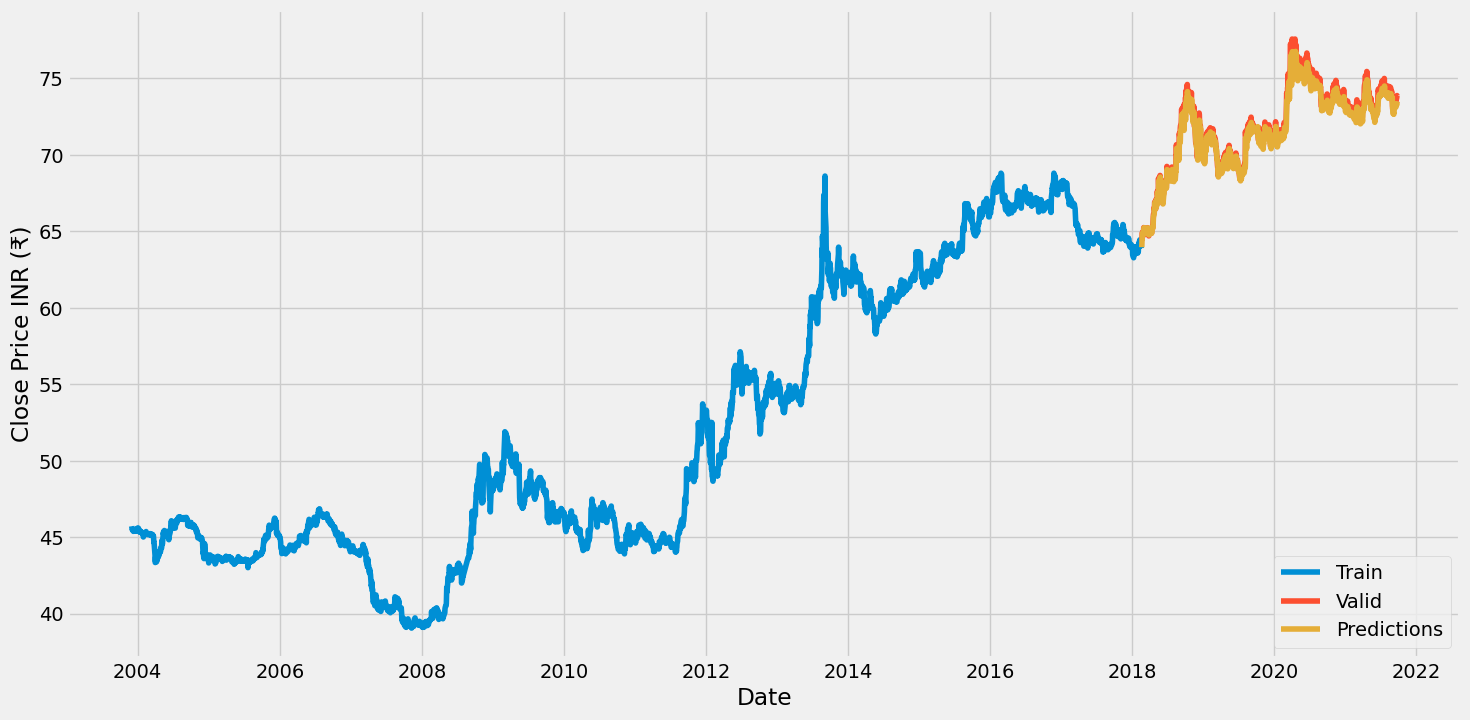

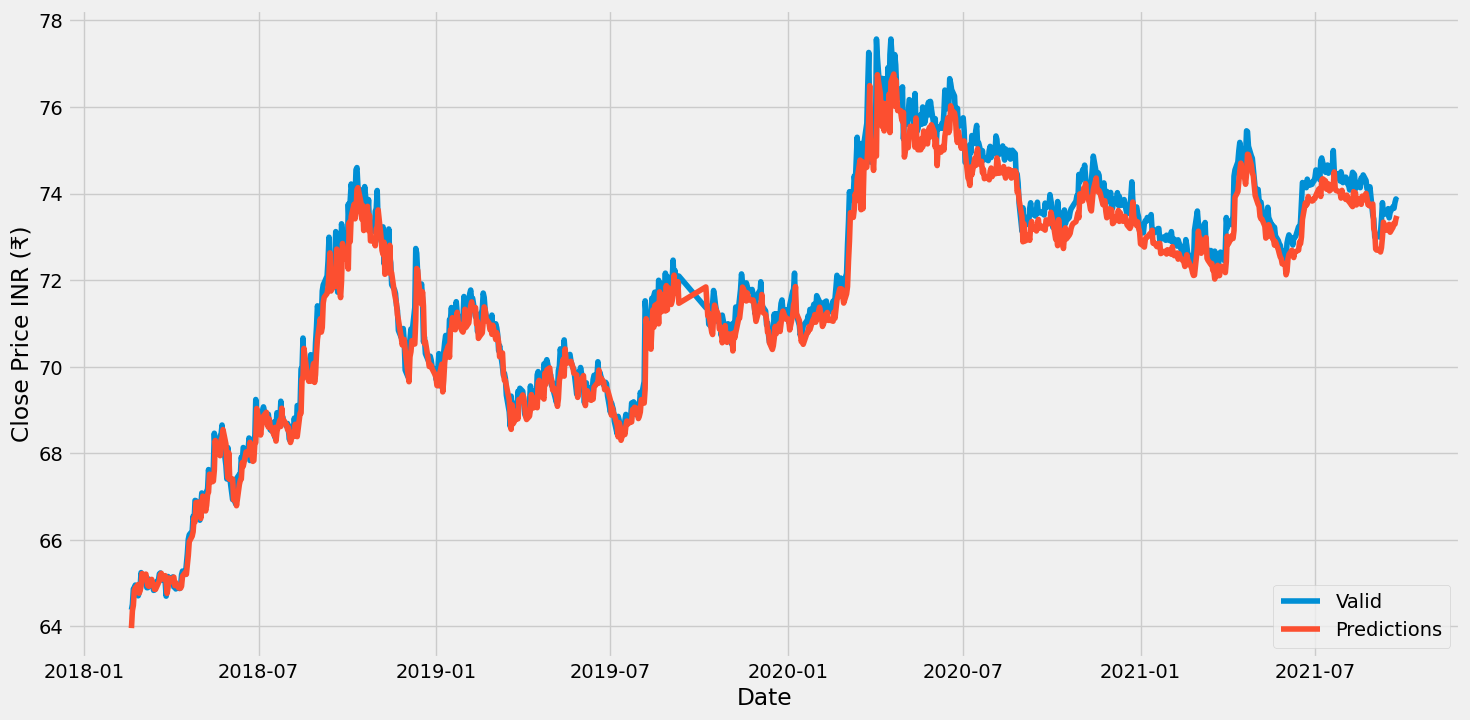

29/29 [==============================] - 1s 21ms/step
Mean Squared Error (MSE): 0.21125936660493125


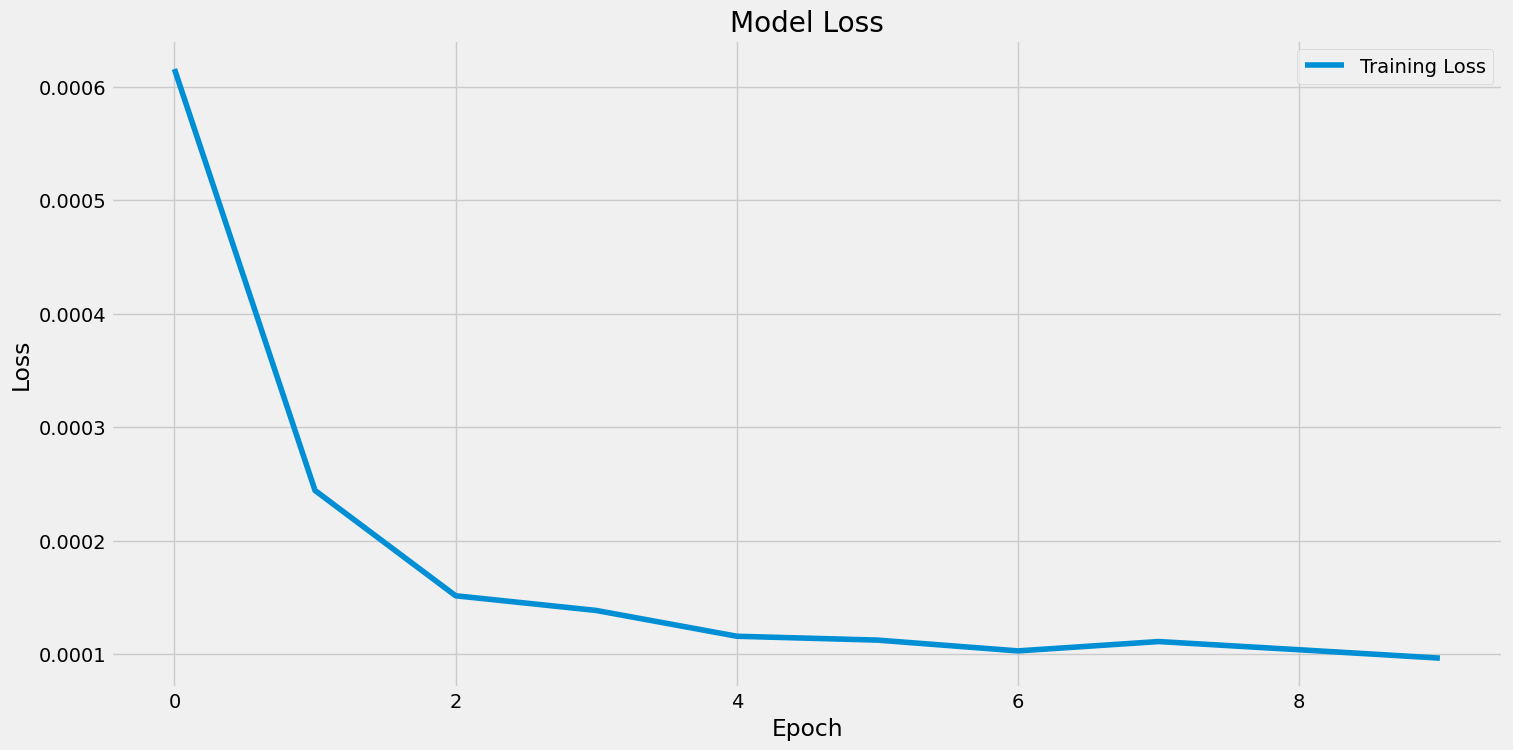

Accuracy: 97.26204883635826 %


In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from keras.layers import Dropout

data = pd.read_csv('/content/drive/MyDrive/Project/USDINRX.csv')
data.head()
data.info()
data.isnull().sum()
data = data.dropna()
data.isnull().sum()
data = data.astype({'Date': 'datetime64[ns]'})
date = data['Date']
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Date'],data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price INR (₹)')
plt.show()
df = data.filter(['Close'])
dataset = df.values
train_data_len = math.ceil(len(dataset)*.8)
train_data_len
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(dataset)
scaler_data
train_data = scaler_data[0:train_data_len , :]
x_train = []
y_train = []

for i in range(60 , len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))


model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(x_train, y_train, epochs=10, batch_size=1)
test_data = scaler_data[train_data_len - 60:, :]
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = pred
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Close Price INR (₹)')
plt.plot(train['Date'],train['Close'])
plt.plot(valid['Date'],valid[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'], loc='lower right')
plt.show()
plt.figure(figsize=(16,8))
plt.plot(valid['Date'],valid[['Close','Predictions']])
plt.legend(['Valid','Predictions'], loc='lower right')
plt.xlabel('Date')
plt.ylabel('Close Price INR (₹)')
plt.show()


# Evaluate model on test data
test_predictions = model.predict(x_test)
test_predictions = scaler.inverse_transform(test_predictions)

# Calculate MSE
mse = np.mean(np.square(test_predictions - y_test))
print("Mean Squared Error (MSE):", mse)

# Plot MSE
plt.figure(figsize=(16, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

from sklearn.metrics import r2_score

# Calculate R-squared for test set
test_r2 = r2_score(y_test, test_predictions)
r2_percent = test_r2 * 100
print("Accuracy:", r2_percent, "%")






Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4649
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4598 non-null   datetime64[ns]
 1   Open       4598 non-null   float64       
 2   High       4598 non-null   float64       
 3   Low        4598 non-null   float64       
 4   Close      4598 non-null   float64       
 5   Adj Close  4598 non-null   float64       
 6   Volume     4598 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 287.4 KB
None


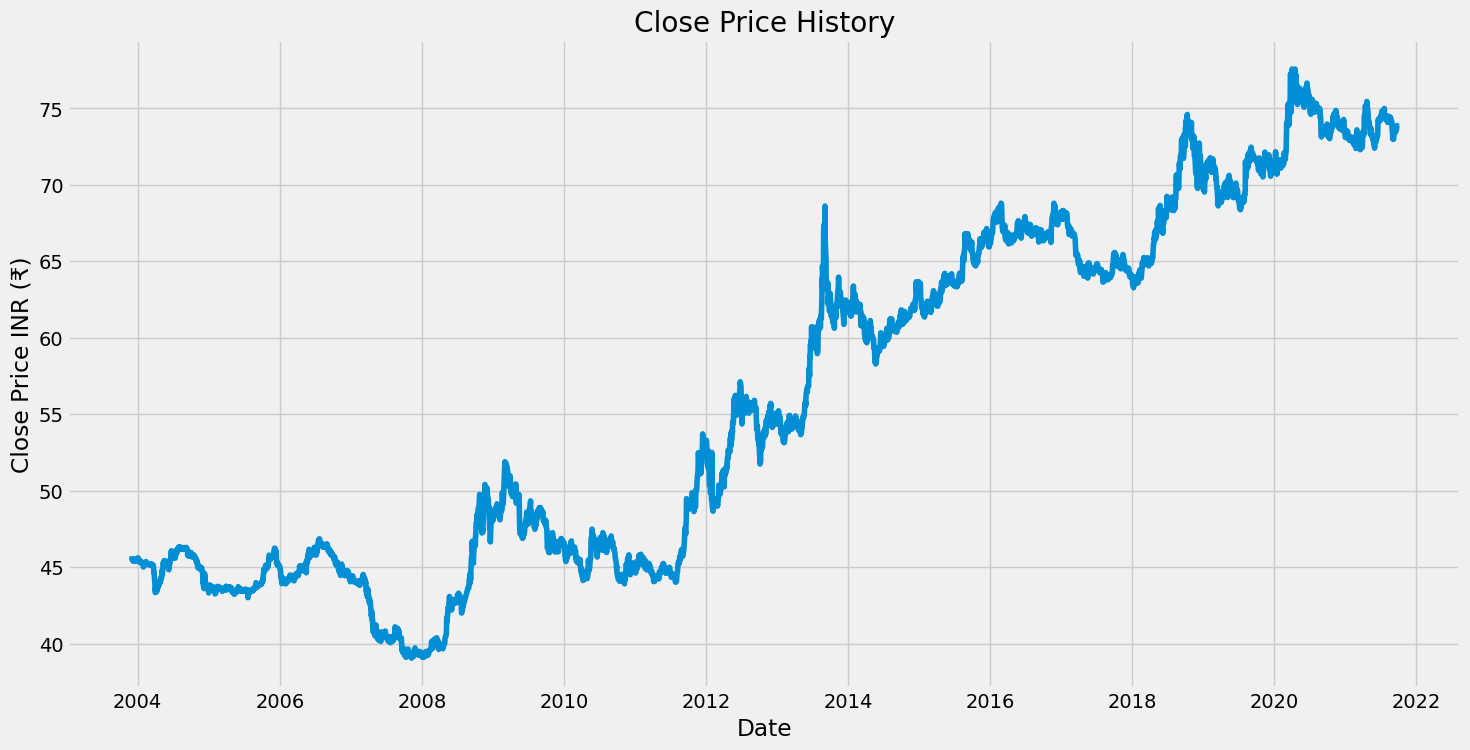


RMSE (Root Mean Squared Error):
Train RMSE: 0.2751970441502295
Test RMSE: 0.3494645100654175


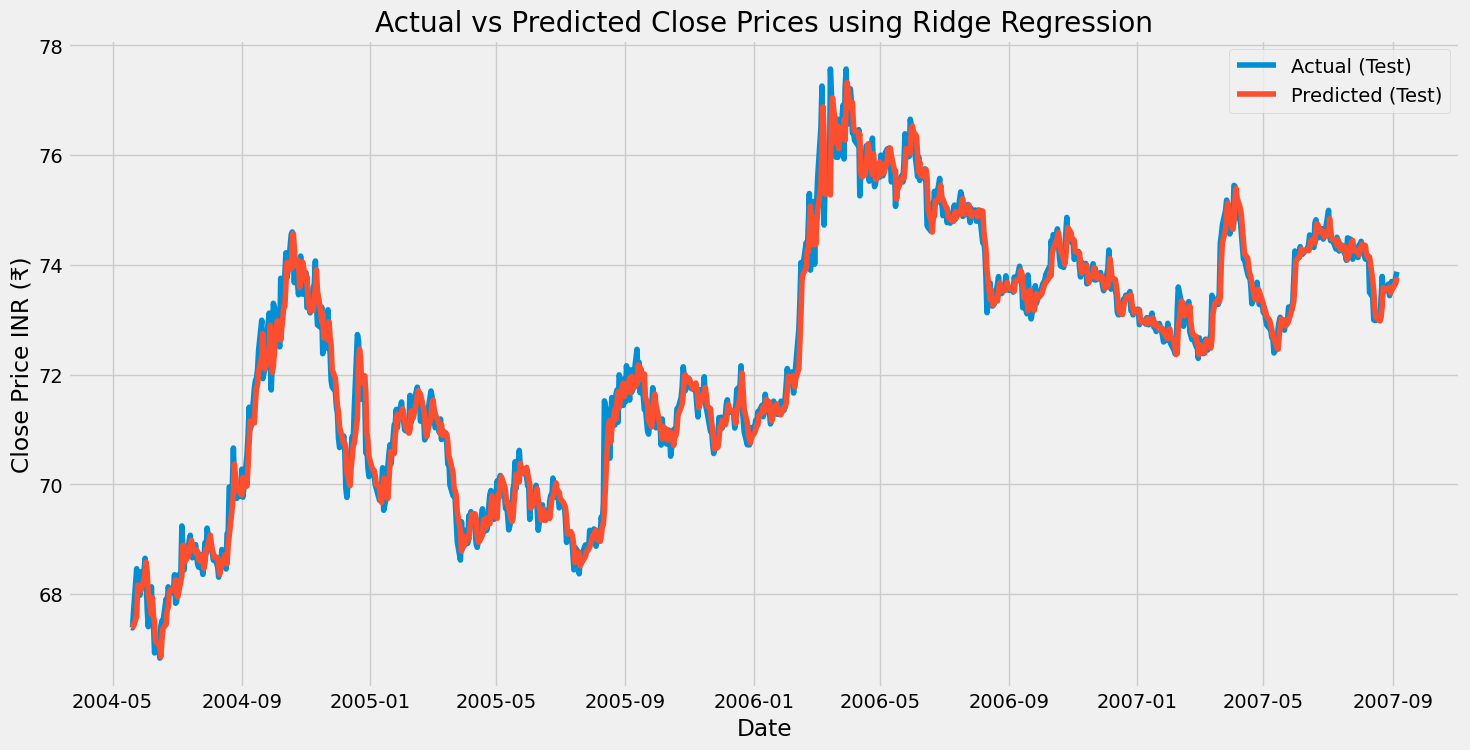

Accuracy for train set: 99.90938235195289%
Accuracy for test set:97.65254905583818%


In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load and preprocess the data
data = pd.read_csv('/content/drive/MyDrive/Project/USDINRX.csv').dropna()
data['Date'] = pd.to_datetime(data['Date'])

# Print information about the data
print("Data Information:")
print(data.info())

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price INR (₹)')
plt.show()

# Prepare the dataset
df = data.filter(['Close'])
dataset = df.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(dataset)

# Split the data into train and test sets
train_size = int(len(scaler_data) * 0.8)
test_size = len(scaler_data) - train_size
train_data, test_data = scaler_data[0:train_size,:], scaler_data[train_size:len(scaler_data),:]

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

# Make predictions
train_predict = ridge.predict(x_train)
test_predict = ridge.predict(x_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1,1))
y_train = scaler.inverse_transform(y_train.reshape(-1,1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print("\nRMSE (Root Mean Squared Error):")
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Shift the date array by the time step
date_test_shifted = data['Date'][2*time_step+1:]

# Match the length of date_test_shifted with test_predict
date_test_shifted = date_test_shifted[:len(test_predict)]

# Visualize the predictions
plt.figure(figsize=(16,8))
plt.plot(date_test_shifted, y_test, label='Actual (Test)')
plt.plot(date_test_shifted, test_predict, label='Predicted (Test)')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price INR (₹)')
plt.title('Actual vs Predicted Close Prices using Ridge Regression')
plt.show()

from sklearn.metrics import r2_score

# Calculate R-squared for training set
train_r2 = r2_score(y_train, train_predict)
print(f"Accuracy for train set: {train_r2*100}%")

# Calculate R-squared for test set
test_r2 = r2_score(y_test, test_predict)
print(f"Accuracy for test set:{test_r2*100}%")



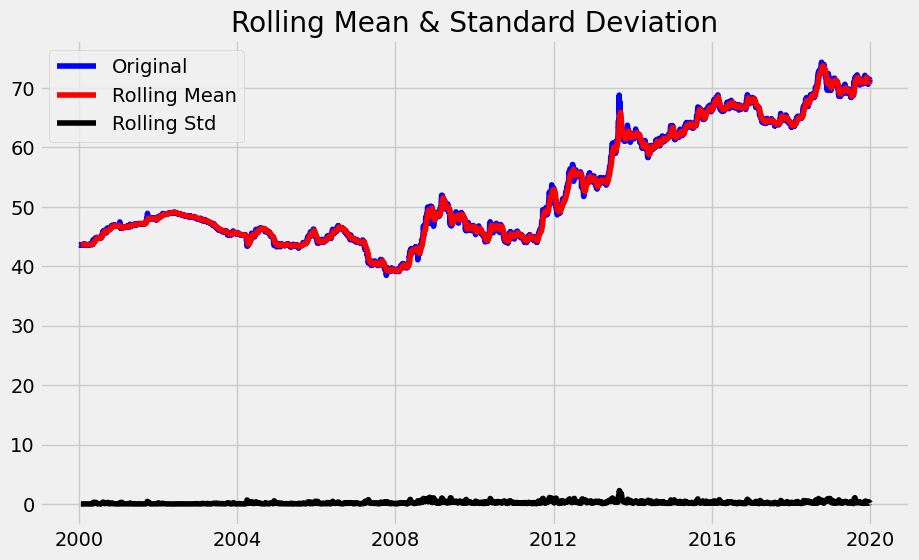

Results of Dickey-Fuller Test:
Test Statistic                   -0.085861
p-value                           0.950829
#Lags Used                        7.000000
Number of Observations Used    5010.000000
Critical Value (1%)              -3.431656
Critical Value (5%)              -2.862117
Critical Value (10%)             -2.567077
dtype: float64
Data is not stationary. Taking first difference.


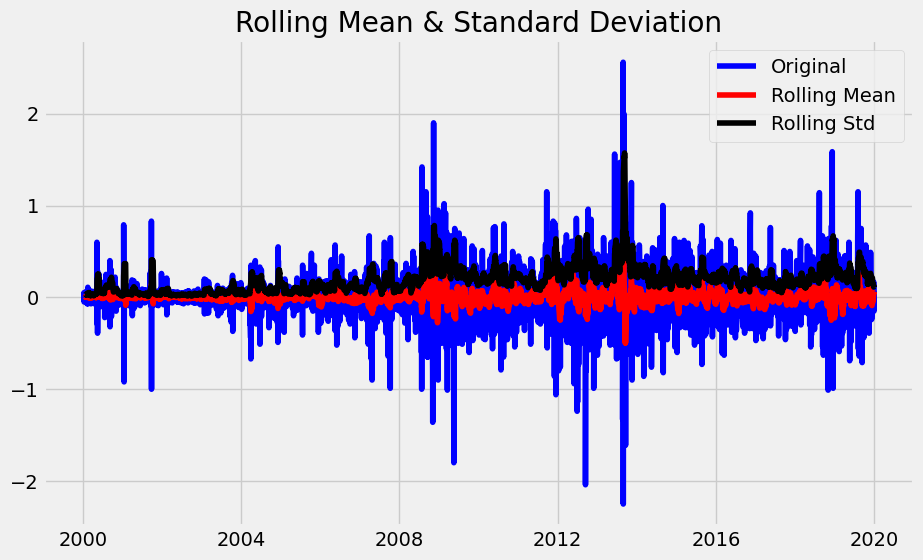

Results of Dickey-Fuller Test:
Test Statistic                  -25.329494
p-value                           0.000000
#Lags Used                        6.000000
Number of Observations Used    5010.000000
Critical Value (1%)              -3.431656
Critical Value (5%)              -2.862117
Critical Value (10%)             -2.567077
dtype: float64


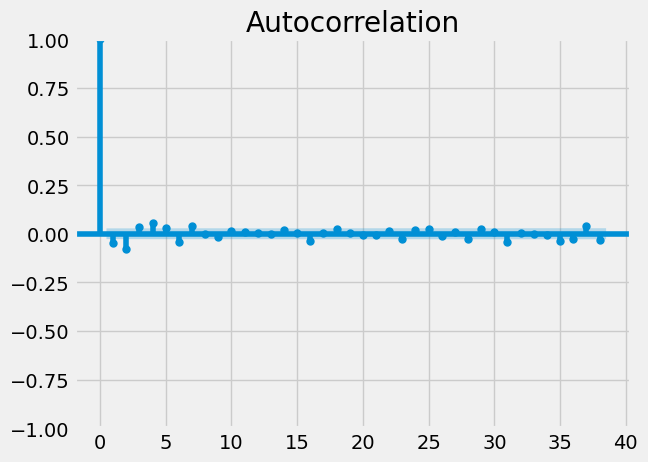

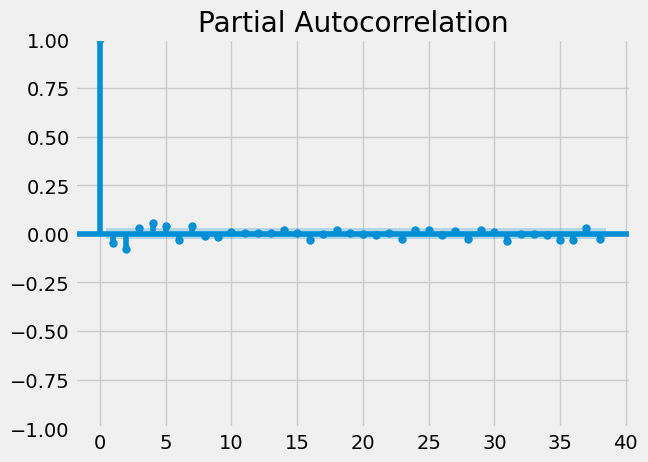

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


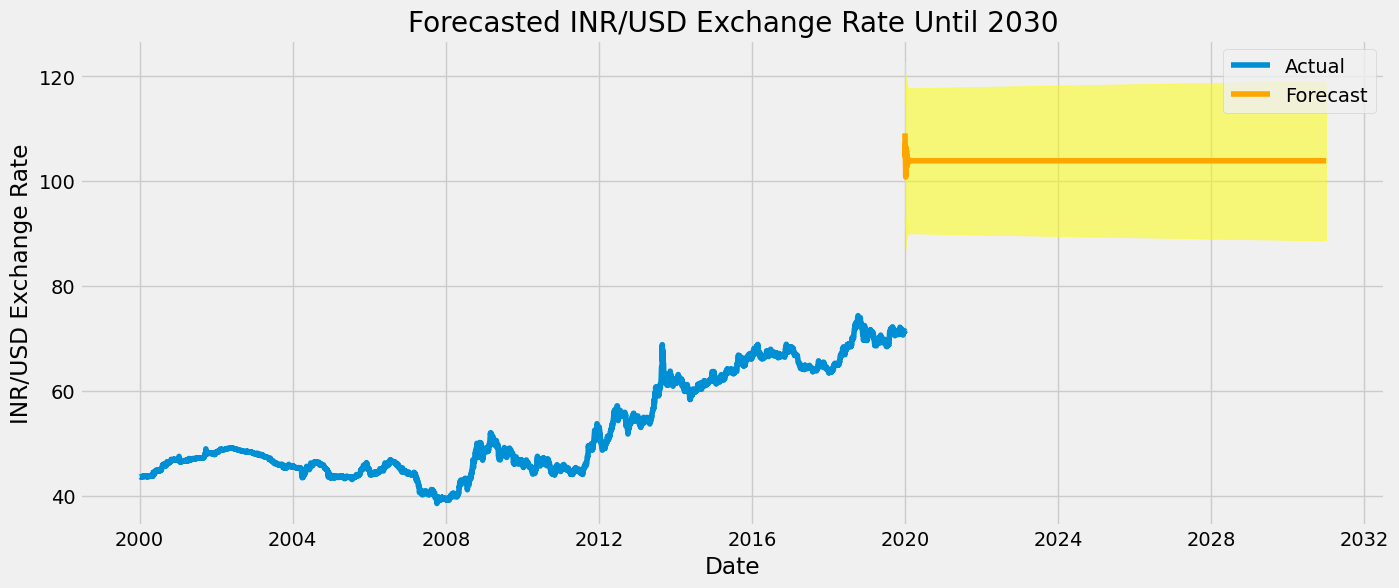

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Project/Foreign_Exchange_Rates.csv")

# Step 2: Preprocess the data
df["Time Serie"] = pd.to_datetime(df["Time Serie"])
df.set_index("Time Serie", inplace=True)

# Replace 'ND' with NaN
df.replace("ND", np.nan, inplace=True)

# Convert all columns to numeric
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors="coerce")

# Use only the INR column
df_inr = df["INDIA - INDIAN RUPEE/US$"].dropna()

# Step 3: Test for stationarity using Dickey-Fuller test
def test_stationarity(timeseries):
    # Calculate rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Test stationarity
test_stationarity(df_inr)

# Step 4: Make the data stationary (if necessary)
if adfuller(df_inr)[1] > 0.05:
    df_diff = df_inr.diff().dropna()
    print("Data is not stationary. Taking first difference.")
else:
    df_diff = df_inr
    print("Data is stationary.")

# Re-test stationarity
test_stationarity(df_diff)

# Step 5: Determine the order of ARIMA model (p, d, q)
plot_acf(df_diff)
plt.show()

plot_pacf(df_diff)
plt.show()

# Step 6: Train a regression model

# Prepare features (dates) and target (INR/USD exchange rate)
X = np.array(df_inr.index).reshape(-1, 1)  # Dates
y = df_inr.values  # INR/USD exchange rate

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Step 7: Apply bagging and boosting

# Bagging
bagging_model = BaggingRegressor(n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_forecast = bagging_model.predict(X_test)

# Boosting
boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_forecast = boosting_model.predict(X_test)

# Step 8: Integrate with ARIMA for forecasting till 2030

# Combine the forecasts from bagging and boosting
ensemble_forecast = (bagging_forecast + boosting_forecast)  # Taking the average of bagging and boosting

# Prepare the input data for ARIMA
start_date = df_inr.index[-1]  # Last known date
end_date = pd.to_datetime("2030-12-31")  # End date for forecasting

# Make predictions using ARIMA
arima_model = ARIMA(ensemble_forecast, order=(25, 1, 1))  # ARIMA(p,d,q) where p=25, d=1, q=0
arima_fit = arima_model.fit()  # Setting disp=False to suppress convergence warning


# Predict future values and confidence intervals till 2030
forecast_arima = arima_fit.get_forecast(steps=(end_date - start_date).days + 1)
forecast_values = forecast_arima.predicted_mean
confidence_intervals = forecast_arima.conf_int(alpha=0.5)  # 50% confidence interval

# Generate date range for forecasted values
forecast_index = pd.date_range(start=start_date, periods=len(forecast_values))

# Plot the graph of forecasted values with confidence intervals
plt.figure(figsize=(15, 6))
plt.plot(df_inr.index, df_inr, label='Actual')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')
plt.fill_between(forecast_index, confidence_intervals[:, 0], confidence_intervals[:, 1], color='yellow', alpha=0.5)
plt.title('Forecasted INR/USD Exchange Rate Until 2030')
plt.xlabel('Date')
plt.ylabel('INR/USD Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()
